In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [294]:
passengers_df = pd.read_csv('passengers.csv')
passengers_series = passengers_df['#Passengers']

In [295]:
def manual_acf(series, max_lag):
    acf_values = []
    mean = series.mean()
    var = np.var(series)
    
    for lag in range(1, max_lag + 1):
        shifted_series = series.shift(lag)
        covariance = np.mean((series[lag:] - mean) * (shifted_series[lag:] - mean))
        acf = covariance / var
        acf_values.append(acf)
    
    return acf_values

In [296]:
max_lag = 50
acf_values_manual = manual_acf(passengers_series, max_lag)

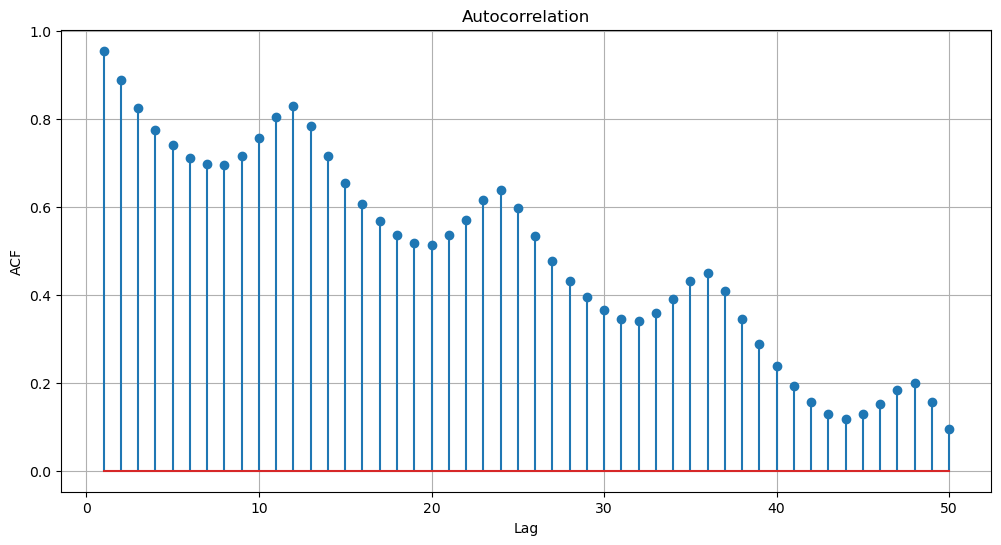

In [297]:
plt.figure(figsize=(12, 6))
plt.stem(range(1, max_lag + 1), acf_values_manual)
plt.title("Autocorrelation")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.grid(True)
plt.show()

In [298]:
from statsmodels.graphics.tsaplots import plot_acf

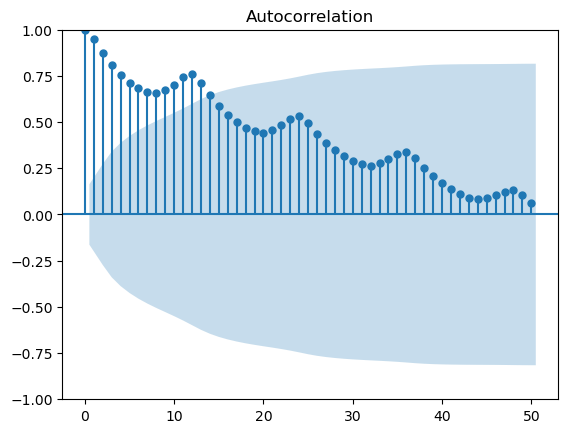

In [299]:
plot_acf(passengers_series, lags=max_lag)
plt.show()

In [300]:
births_df = pd.read_csv('births.csv')
births_series = births_df['Births']
births_series

0      35
1      32
2      30
3      31
4      44
       ..
360    37
361    52
362    48
363    55
364    50
Name: Births, Length: 365, dtype: int64

<Axes: >

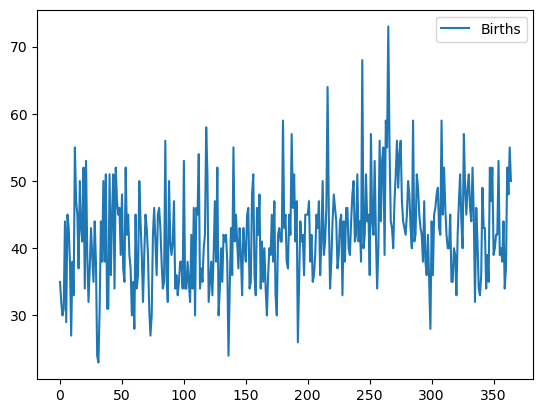

In [301]:
births_df.plot()

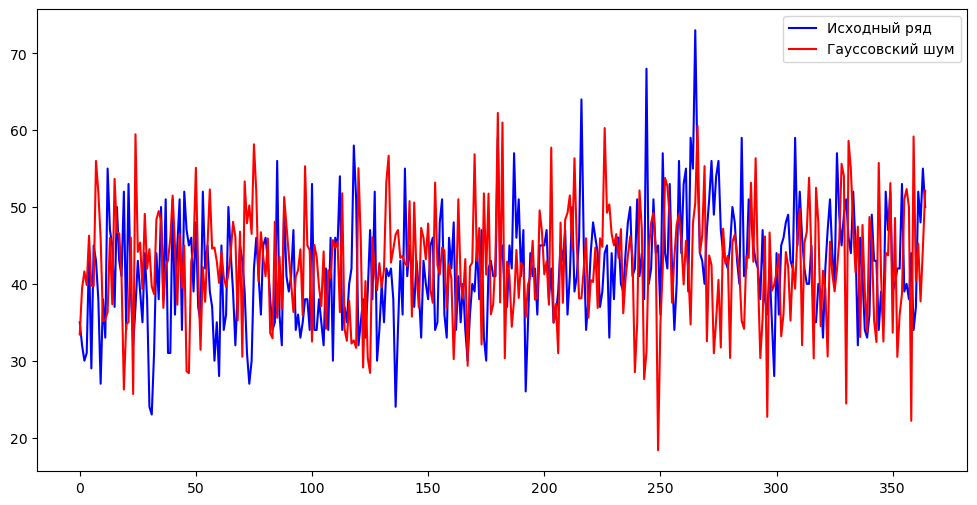

In [302]:
gaussian_noise = np.random.normal(births_series.mean(), births_series.std(), len(births_series))

plt.figure(figsize=(12, 6))

plt.plot(births_series, color="blue", label="Исходный ряд")
plt.plot(gaussian_noise, color="red", label="Гауссовский шум")

plt.legend()
plt.show()

In [303]:
def manual_acf(series, max_lag):
    acf_values = []
    mean = series.mean()
    var = np.var(series)
    
    for lag in range(1, max_lag + 1):
        shifted_series = series.shift(lag)
        covariance = np.mean((series[lag:] - mean) * (shifted_series[lag:] - mean))
        acf = covariance / var
        acf_values.append(acf)
    
    return acf_values

In [304]:
max_lag = 50
acf_values_manual = manual_acf(births_series, max_lag)

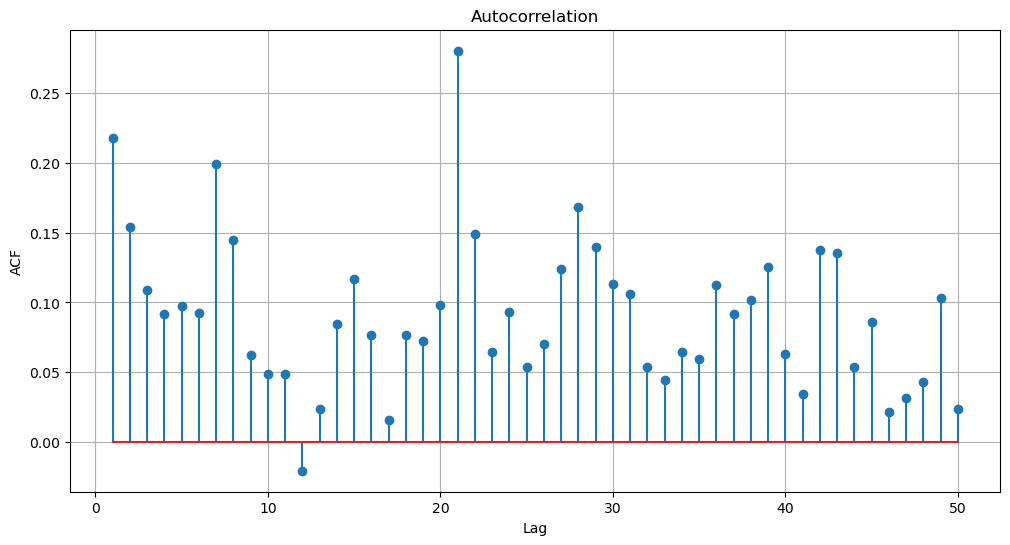

In [305]:
plt.figure(figsize=(12, 6))
plt.stem(range(1, max_lag + 1), acf_values_manual)
plt.title("Autocorrelation")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.grid(True)
plt.show()

In [306]:
from statsmodels.graphics.tsaplots import plot_acf

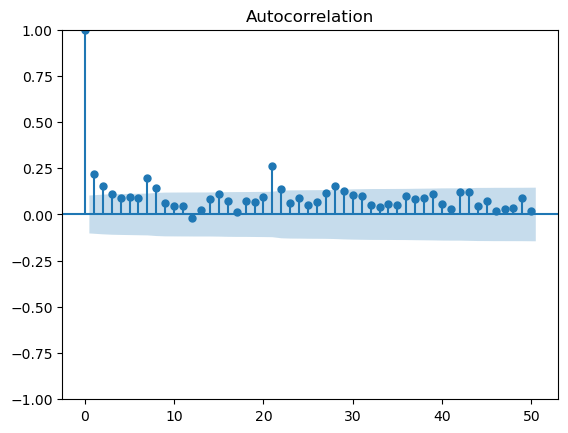

In [307]:
plot_acf(births_series, lags=max_lag)
plt.show()

In [308]:
from statsmodels.tsa.stattools import adfuller

In [309]:
adf_df = adfuller(births_series)
print("ADF-тест для датасета births")
print(f"p-значение: {adf_df[1]}")

ADF-тест для датасета births
p-значение: 5.243412990149813e-05


In [310]:
x_values = np.arange(0, 50, 0.1)
sin_series = pd.Series(np.sin(x_values))

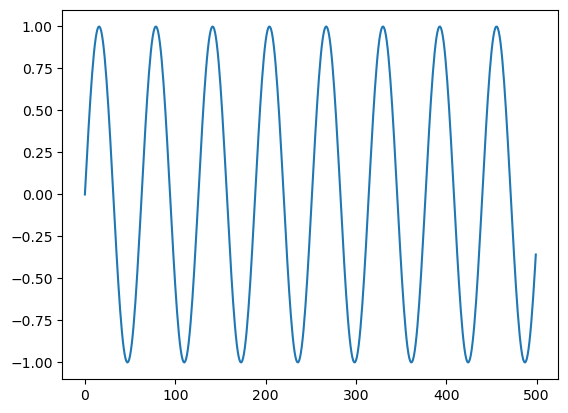

In [311]:
plt.plot(sin_series)

In [312]:
max_lag = 100
acf_values_manual = manual_acf(sin_series, max_lag)

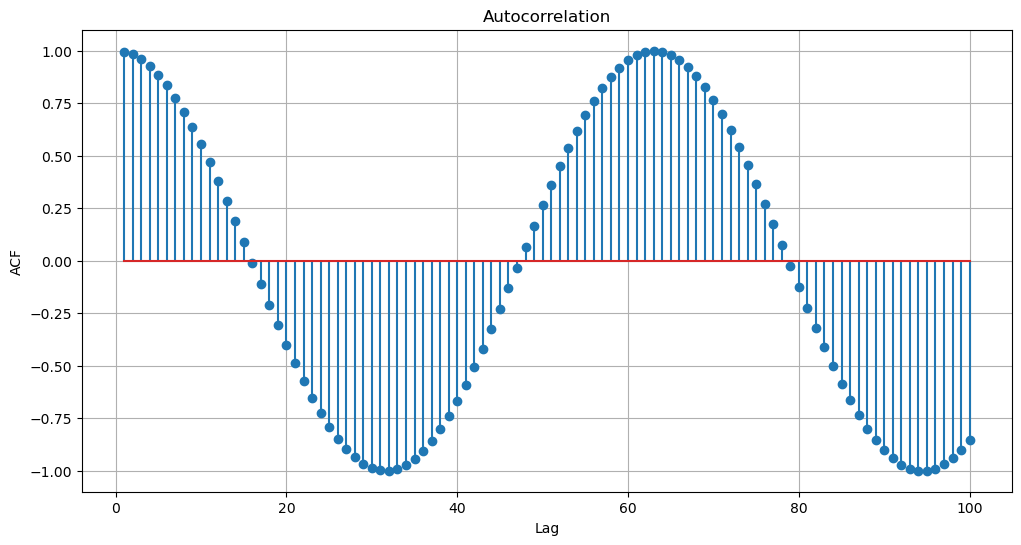

In [313]:
plt.figure(figsize=(12, 6))
plt.stem(range(1, max_lag + 1), acf_values_manual)
plt.title("Autocorrelation")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.grid(True)
plt.show()

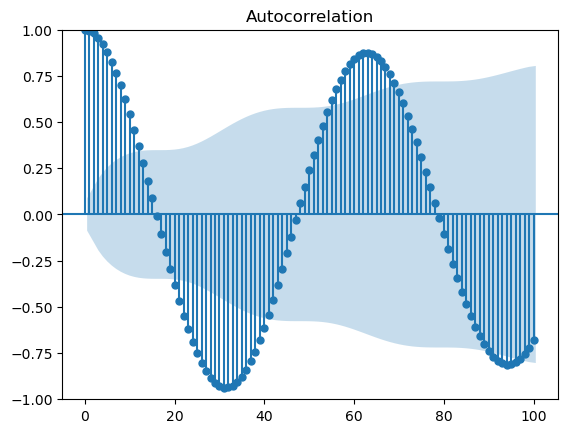

In [314]:
plot_acf(sin_series, lags=max_lag)
plt.show()